# Introduction à la théorie des graphes 

## A - Exploration d'un réseau social : Les Misérables 



Nous allons commencer ce module de théorie des graphes et détection de communauté en analysant le graphe des interactions dans Les Misérables, l'oeuvre de Victor Hugo parue en 1862. Deux personnages sont ici reliés par une arête du graphe s'ils apparaissent au cours du même chapitre. L'objectif de l'exercice sera donc d'identifier des communautés de personnage au sein de ce roman.

Si vous avez lu le livre, vous pouvez constater que les personnages principaux tiennent également un rôle central dans le graphe.
Le graphe que nous allons importer est stocké dans un fichier de type gml, qui est un format de fichier développé spécifiquement pour stocker des graphes (Graph Modelling Language en anglais). On lit un fichier gml avec NetworkX en uilisant read_gml et on enregistre un graphe au format gml en utilisant write_gml

Exécutez le code ci-dessous pour importer et afficher le graphe
Quelles semblent être d'après vous les différentes communautés qui composent ce réseau ?

In [ ]:
""" pb lesmis.gml inconnu error """

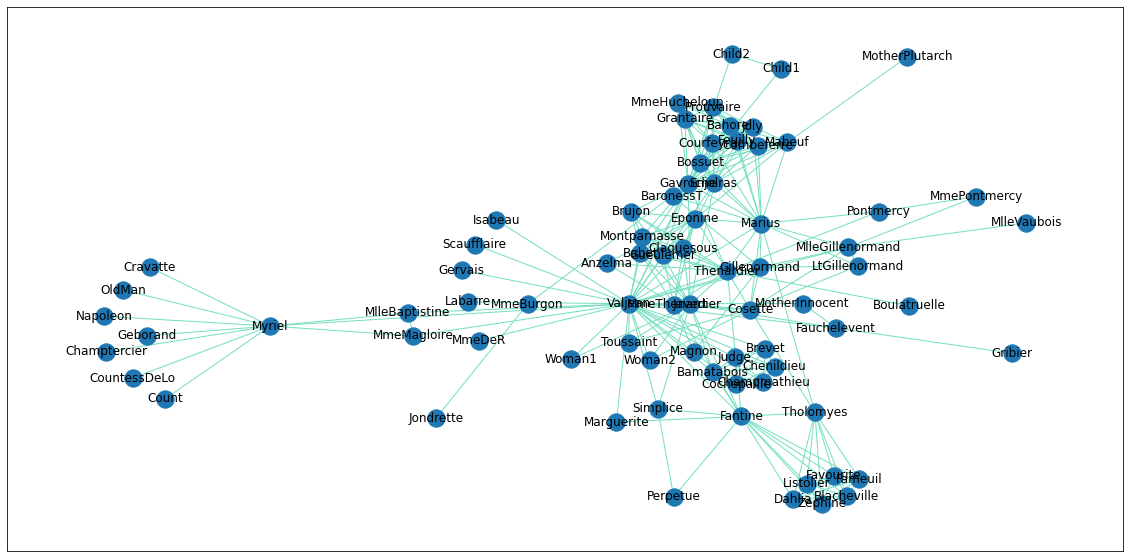

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

G = nx.read_gml('lesmis.gml')

pos = nx.fruchterman_reingold_layout(G)

plt.figure(figsize = (20, 10))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, edge_color = "#75DFC1")
nx.draw_networkx_labels(G, pos)
plt.show();

On constate sans surprise que les personnages centraux de l'intrigue semblent être les personnages avec le plus de liens vers les autres personnages. Javert, Valjean ou encore Cosette sont disposés au centre de la disposition de Fruchterman Reignold et semblent être les sommets avec le plus de connexions. On va voir quels sommets ont le plus grand degré dans ce graphe.

Exécutez la cellule de code suivante pour lister les sommets de plus haut degré

In [3]:
dict1 = dict(G.degree())
for pers in sorted(dict1, key=dict1.get)[-5:-1]:
    print(pers,  "est connecté à", G.degree(pers), "autres personnages")

Thenardier est connecté à 16 autres personnages
Javert est connecté à 17 autres personnages
Marius est connecté à 19 autres personnages
Gavroche est connecté à 22 autres personnages


A l'aide de la méthode de Louvain, nous allons rechercher le partitionnement en communautés qui maximise la modularité de ce graphe. C'est une des méthodes qui permet d'identifier des communautés au sein d'un réseau social représenté sous la forme d'un graphe.

Exécutez la cellule suivante pour faire tourner la méthode de Louvain sur le graphe

In [5]:
from community.community_louvain import best_partition
best_part = best_partition(G)


Nous allons maintenant afficher le résultat de notre algorithme de détection de communautés afin de voir si il confirme notre intuition

Exécutez la cellule suivante pour afficher le résultat de l'algorithme de Louvain.

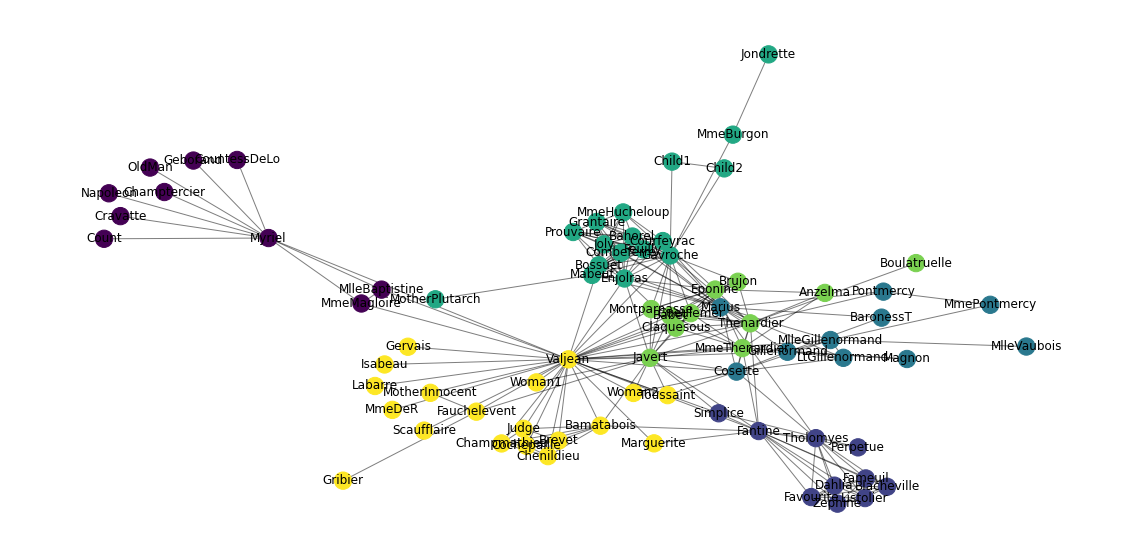

In [6]:
plt.figure(figsize=(20,10))
plt.axis('off')
pos = nx.fruchterman_reingold_layout(G)
node_cluster = list(best_part.values())
nx.draw_networkx_nodes(G, pos, node_color = node_cluster)
nx.draw_networkx_edges(G, pos, alpha = 0.5)
nx.draw_networkx_labels(G, pos)
plt.show()


Nous allons terminer la détection de communautés en évaluant la qualité de notre partitionnement à l'aide d'une métrique. On fait ici le choix de la métrique coverage implémentée par NetworkX qui compare le nombre d'arêtes au sein des communautés au nombre total d'arêtes du graphe.

In [7]:
from networkx.algorithms.community.quality import coverage

# Définir la séquence de la meilleure partition
sequence = [list() for _ in range(6)]
sorted_best_partition = sorted(best_part.items(), key=lambda t: t[1])
for e in sorted_best_partition:
    sequence[e[1]].append(e[0])

# Mesurer la qualité de la méthode de Louvain
print("Ce partitionnement obtient un score de couverture de :", coverage(G, sequence))

Ce partitionnement obtient un score de couverture de : 0.7637795275590551


## B - Premiers pas 

Bienvenue à ce cours introductif à la théorie des graphes. L'objectif de cette formation est d'apprendre à manipuler les graphes à l'aide de NetworkX, un module très populaire en Python pour le maniement des données graphes. Le sujet est vaste et l'objectif de ce tutoriel est de dispenser toutes les bases, théoriques et pratiques, nécessaires à l'utilisation des graphes dans différents cas d'usages que nous abordons dans les prochains workshops.

Qu'est-ce qu'un graphe ?
Un graphe est un ensemble de sommets reliés par des arrêtes. Généralement, un graphe permet de modéliser un phénomène réel, les sommets représentant des objets et les arrêtes les liens entre eux. Commençons par un exemple simple :

Importer le module networkx sous le nom nx
Importez le module pandas sous le nom pd

In [12]:
import networkx as nx
import pandas as pd

In [ ]:
Chargez le fichier edgelist.csv dans un DataFrame df en spécifiant que la première colonne doit servir d'index
Affichez les 5 premières lignes de ce dataframe

In [25]:
df = pd.read_csv('edgelist.csv', sep=';')
df.head()

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


Ce jeu de données correspond à une liste d'arêtes qui forment un graphe. Chaque ligne correspond à une arête qui relie le sommet source au sommet target. On peut convertir cet objet de type DataFrame en un graphe NetworkX en utilisant la fonction from_pandas_edgelist

Exécutez le code ci dessous

D'après vous, combien de sommets et combien d'arrêtes ce graphe possède-t-il ?

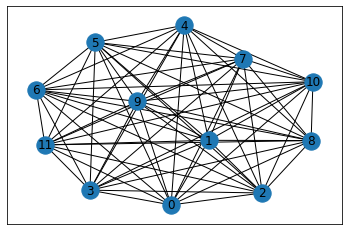

In [26]:
%matplotlib inline

G = nx.from_pandas_edgelist(df)
nx.draw_networkx(G)

Pour les sommets, c'est facile, on en compte  1212 , ils sont numérotés de 0 à 11 Pour les arêtes, chaque sommet est relié à tous les autres. Il y a donc  1111  arêtes qui partent du sommet n°0. Il y en a  1111  qui partent du n°1 aussi. Mais l'une d'entre elles vient du sommet 0 : il ne faut pas la compter deux fois ! On applique le même raisonnement à tous les sommets à la suite, et on trouve  11+10+...+111+10+...+1  arêtes dans ce graphe, soit  6666  arêtes.

Il existe en fait deux types de graphes :

Un graphe non orienté est un couple formé d'un ensemble de sommets et un ensemble d'arêtes. Deux sommets reliés par au moins une arête sont dits adjacents.
Un graphe orienté est un graphe dont les arêtes sont orientées. On distingue alors le sommet origine (prédécesseur) de l'arête et son extrémité (successeur). La convention veut que les arêtes orientées soient marquées par une flèche.
Dans un premier temps, nous allons voir comment utiliser NetworkX pour créer et manipuler des graphes simples.

Créer un graphe vide G : une instance de la classe Graph de Networkx

In [28]:
# Créer un graphe vide
G = nx.Graph()

La construction du graphe G peut se faire de plusieurs façons. NetworkX inclut de nombreuses fonctions qui permettent la génération des graphes et de multiples fonctionnalités pour lire et écrire des graphes en plusieurs formats.

   L'objet None de Python ne peut pas être utilisé comme nœud   
   
### Ajout de noeuds 

La méthode G.add_node(1) permet d'ajouter un nœud au graphe G
La méthode G.add_nodes_from([2,3]) sert à ajouter une liste de nœuds au graphe G   

Pour ajouter un conteneur itérable de nœuds au graphe G :
H = nx.path_graph(10) #crée 10 noeuds 
G.add_nodes_from(H)   

La méthode G.add_node(H) permet d'ajouter le graphe H en tant que nœud au graphe G
Ajouter 12 nœuds au graphe G en utilisant un conteneur itérable

In [29]:
# Ajouter un conteneur itérable de noeuds
H = nx.path_graph(12)
G.add_nodes_from(H)

### Ajout d'arêtes 
Après avoir ajouté des nœuds au graphe G, NetworkX permet d'ajouter les liens (arêtes) entre les sommets :

La méthode G.add_edge(1,2) permet d'ajouter une seule arête liant les nœuds 1 et 2
La méthode G.add_edges_from([(1,2),(1,3)]) ajoute une liste d'arêtes au graphe G
La méthode G.add_edges_from(H.edges()) sert à ajouter un groupe d'arêtes du graphe H au graphe G   

Ajouter les arêtes suivantes au graphe G : (0, 1), (1, 2), (2, 3), (3, 4), (7, 8), (8, 9), (9, 10) et (10, 11)

In [30]:
# Ajouter une liste d'arêtes au graphe G
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (7, 8), (8, 9), (9, 10), (10, 11)])

### Suppression d'un noeud ou d'une arête  

La suppression des nœuds et des arêtes se fait de la même manière :

Les méthodes G.remove_node et G.remove_edge permettent respectivement de supprimer un nœud et une arête du graphe G
Les méthodes G.remove_nodes_from et G.remove_edges_from sont utilisées respectivement pour supprimer une liste d'objets de nœuds et d'arêtes du graphe G
Supprimer les nœuds suivants du graphe G : 5, 6 et 7   

   La méthode clear permet de supprimer tous les nœuds et les arêtes d'un graphe

In [31]:
# Suppression d'une liste de noeuds du graphe G
G.remove_nodes_from([5, 6, 7])

### Quelques méthodes et attributs utiles
Le package NetworkX offre d'accéder aux caractéristiques principales d'un graphe :

Les méthodes number_of_nodes et number_of_edges permettent de calculer respectivement son nombre de nœuds et son nombre d'arêtes.
Les attributs nodes et edges servent respectivement à récupérer des nœuds et les arêtes. Le code suivant permet de récupérer les nœuds du graphe G sous forme d'une liste : list(G.nodes). Il est possible de lister les liens d'un groupe de sommets group en utilisant la méthode edges ainsi : G.edges(group)   

L'attribut adj permet de lister les voisins d'un nœud. Afin de récupérer, par exemple, la liste des voisins du nœud 1, l'attribut adj est utilisé ainsi : list(G.adj[1])
Lister les nœuds du graphe G

In [32]:
# Récupérer la liste des noeuds
list(G.nodes)

[0, 1, 2, 3, 4, 8, 9, 10, 11]

### Degré d'un noeud
Le degré d'un sommet est défini comme étant le nombre d'arrêtes connectées à ce noeud. Dans le cas d'un graphe orienté on distingue le degré entrant du degré sortant.

Pour calculer le degré d'un sommet s l'attribut degree est utilisé comme suit : G.degree[s]. Dans le cas des graphes orientés, on distingue pour un noeud le degré entrant et le degré sortant. On utilisera alors G.in_degree[s] ou G.out_degree[s]

Afficher le degré du premier sommet 1 de G

In [33]:
# Calculer le degré du sommet 0 du graphe G
G.degree[1]

2

### Matrice d'adjacence

La matrice d'adjacence est la représentation d'un graphe fini à l'aide d'une matrice. Pour un graphe fini  G  à  n  sommets, la matrice d'adjacence  A=(ai,j)1≤i≤n,1≤j≤n appartient à l'ensemble  ℝn×n  et l'élément  ai,j  indique s'il exsite une arête que relie le sommet  i  au sommet  j .

   La matrice d'adjacence d'un graphe non orienté est donc symétrique.

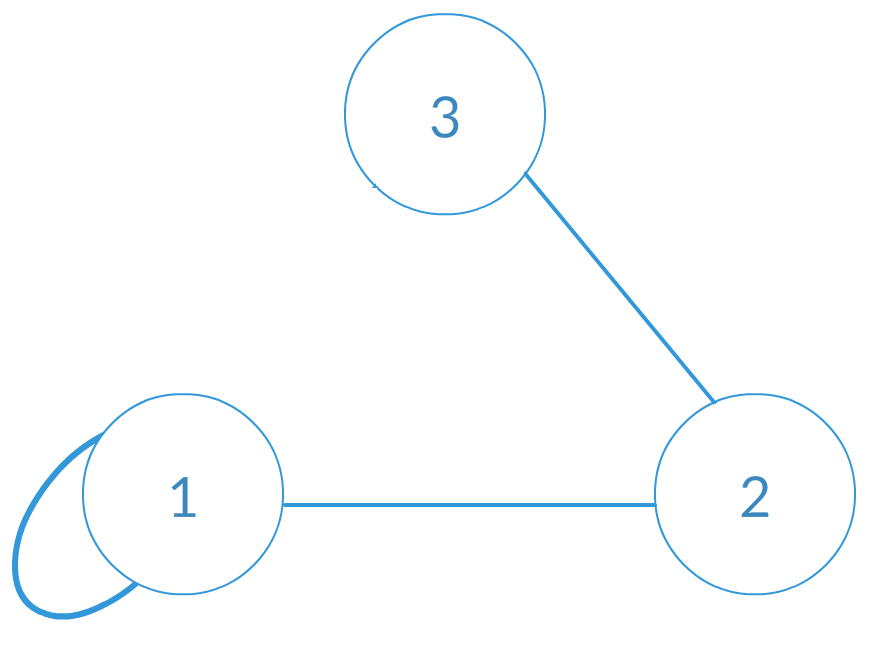 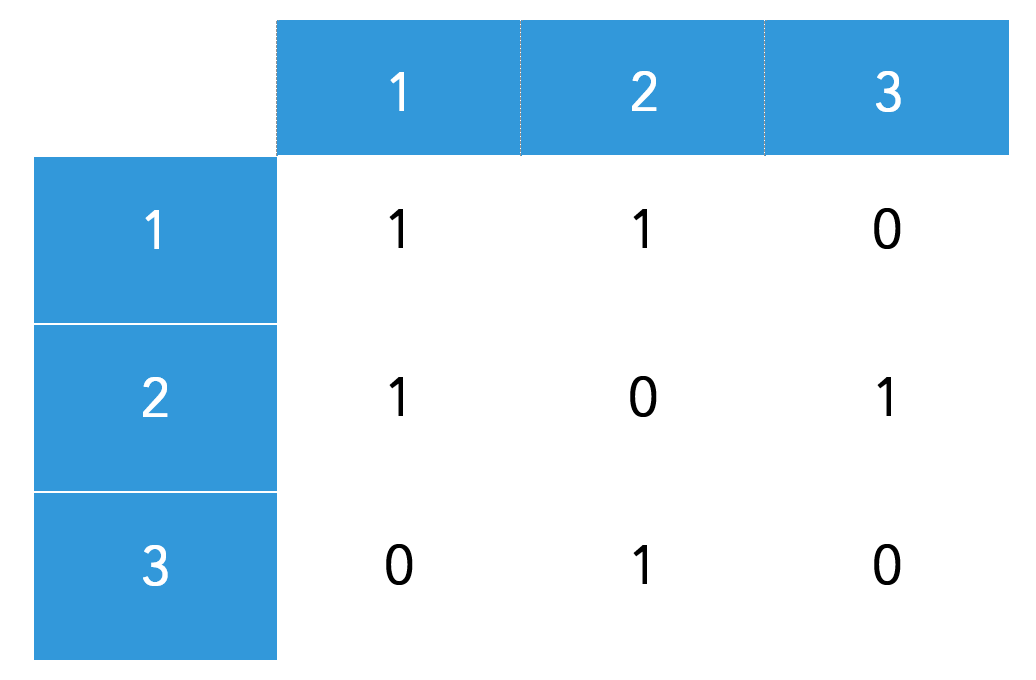

Le package NetworkX implémente la méthode adjacency_matrix qui permet de calculer la matrice d'adjacence d'un graphe fini :

Python
### Calculer la matrice d'adjacence du graphe G
A = nx.adjacency_matrix(G)
La matrice d'adjacence calculée ci-dessus est de type csr_matrix. Afin de pouvoir visualiser cet objet, il est nécessaire de calculer la représentation matricielle dense de cette matrice comme suit :

Python
### Récupérer la représentation matricielle de l'objet A
A.todense()
   csr_matrix est un type d'objet numpy qui permet de représenter des matrices creuses de manière efficace en mémoire. Il est rare qu'un sommet soit relié à une majorité des autres sommets du graphe, la plupart des coefficients d'une matrice d'adjacence sont donc généralement nuls. C'est ce qu'on appelle une matrice creuse.
Calculer et afficher la matrice d'adjacence du graphe G

In [40]:
# Calculer la matrice d'adjacence du graphe G
A = nx.adjacency_matrix(G)

# Convertir et afficher la matrice d'adjacence du graphe G
A.todense()
#A noter que la matrice d'adjacence d'un graphe non orienté est toujours symétrique

C:\Users\UserPC\AppData\Local\Temp\ipykernel_9956\1863077421.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

In [41]:
""" plante chez mio car pb version scipy
# print( nx.__version__)  # eux on la 1.5.2 en scipy ( moi 1.7.3) et 1.1.5 en pandas ( moi 1.4.2) , eux networkX en 2.4   et moi 2.7.1
devrait afficher ceci
matrix([[0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0]])

2.7.1


### Visualisation des graphes
Le package NetworkX propose également un outil de visualisation de graphe. Il permet de représenter les nœuds et les arêtes grâce à la fonction draw_networkx, qui dessine le graphique G à l'aide de la librairie Matplotlib. Cette fonction comporte de nombreux paramètres pour personnaliser son graphe, comme with_labels, node_shape ou font_weight

Tracer le graphe G

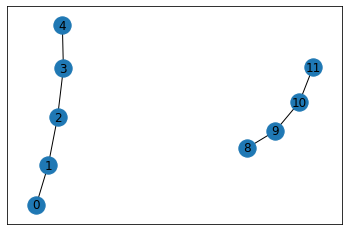

In [42]:
nx.draw_networkx(G)

Il est possible de personnaliser la représentation graphique d'un graphe. Les méthodes de visualisation des graphes permettent de paramétrer la couleur des noeuds, leur taille, la couleur des arêtes, leur largeur, etc...

Il existe une infinité de repréentations d'un même graphe, puisque seules les arêtes et le liens importent, et non le placement relatif des sommets. Selon les propriétés à identifier on peut choisir différentes représentations d'un graphe
Exécuter le code ci-dessous pour afficher le même graphe sous une autre forme.

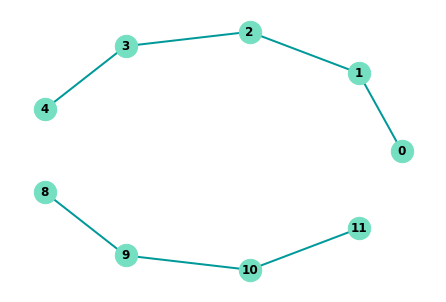

In [43]:
# Définir les paramètres de la représentation graphique du graphe G
options = {
    'node_color': '#75DFC1',
    'edge_color': '#009999',
    'node_size': 500,
    'width': 2,
    'with_labels': True,
    'font_weight': 'bold'
}

# Afficher le graphe G 
nx.draw_circular(G, **options)
#La méthode du dictionnaire d'options est très pratique pour passer les mêmes options en parmaètre de plusieurs graphes.

L'objectif de NetworkX est l'analyse de graphes plutôt que la visualisation. Pour visualiser des graphes plus complexes il est conseillé d'utiliser des outils spécialisés, comme la librairie Bokeh en Python ou bien D3.js en javascript.

## C - Algorithmes fondamentaux : Kruskal et Dijkstra 


Dans ce cours, nous allons aborder les dernières notions importantes à maitriser en théorie des graphes, puis nous verrons comment nous pouvons les exploiter dans des algorithmes classiques. Nous allons utiliser NetworkX pour créer et afficher un graphe sur lequel nous allons travailler dans la première partie de cet exercice.

Complétez la cellule de code ci-dessous en suivant les consignes en commentaire pour importer le package et afficher le graphe.

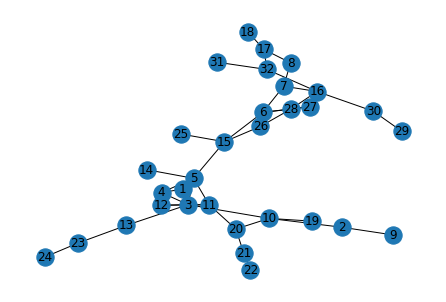

In [44]:
# Importez le package NetworkX sous le nom nx
# Importez le package matplotlib
import networkx as nx
import matplotlib


G = nx.Graph()

G.add_nodes_from(range(1, 32))

G.add_edges_from([(1, 3), (2, 9), (2, 10), (10, 19), (10, 20), (10, 3), (20, 11), (20, 21), (21, 22),\
                  (11, 12), (3, 4), (3, 13), (13, 23), (23, 24), (14, 5), (5, 15), (15, 26), (15, 25),\
                  (15, 6), (6, 7), (7, 8), (7, 16), (17, 18), (17, 32), (32, 31), (16, 28), (16, 30),\
                  (30, 29), (28, 27), (17, 8), (16, 32), (28, 6), (28, 26), (6, 27), (1, 5), (1, 4),\
                  (3, 12), (3, 11), (4, 12), (5, 11), (3, 5), (4, 5)])

# Affichez le graphe généré
nx.draw_spring(G, with_labels=True)
#draw_spring est une méthode qui permet de répartir au mieux les sommets sur la zone de dessin

### Quelques définitions

Un graphe est connexe si on peut joindre n'importe quelle paire de sommets par un chemin qui est une suite d'arêtes adjacentes. De manière intuitive, on pourrait dire qu'un graphe connexe est un graphe qui est "d'un bloc".

Une composante connexe d'un graphe est un sous-graphe connexe de ce graphe

A l'aide de la fonction is_connected déterminez si le graphe  GG  est connexe

In [45]:
nx.is_connected(G)

True

Un cycle est une suite d'arêtes consécutives (chaine simple) dont les deux sommets extrémités sont identiques.

Un arbre est un graphe connexe, sans cycle. Pour un graphe connexe  GG  à  nn  sommets,  GG  est un arbre si et seulement si G possède  n−1n−1  arêtes.

Une forêt est un graphe dont les composantes connexes sont des arbres.

À l'aide la fonction is_tree déterminez si le graphe G est un arbre

Si G n'est pas un arbre, identifiez une liste d'arrêtes formant un cycle dans ce graphe à l'aide de la fonction find_cycle

In [46]:
print(nx.is_tree(G))
print(nx.find_cycle(G))

False
[(3, 10), (10, 20), (20, 11), (11, 12), (12, 3)]


Lorsque l'on cherche à analyser un graphe sur lequel on ne sait rien à priori, il peut également être intéressante de s'intéresser à sa "topographie", de la même manière qu'on explore un jeu de données avant de travailler dessus, on va ici chercher la taille ou la densité du graphe par exemple.

Cacluler la taille, et l'ordre du graphe  GG , à l'aide des fonctions number_of_nodes et number_of_edges

En déduire par un calcul simple le degré moyen du graphe  GG

In [47]:
# Calculer la taille du graphe G
order = nx.number_of_nodes(G)
print("Le graphe a :",order, "noeuds")

# Calculer l'ordre du graphe G
size = nx.number_of_edges(G)
print("Le graphe a :", size, "arêtes")

# Calculer la degré moyen du graphe G
average_degree = 2 * size / order
print("Soit une moyenne de" , average_degree, "arêtes par noeuds")

Le graphe a : 32 noeuds
Le graphe a : 42 arêtes
Soit une moyenne de 2.625 arêtes par noeuds


### Algorithme de Kruskal
Imaginons que l'on cherche à créer un nouveau réseau de fibre optique entre plusieurs villes qui sont pour l'instant seulement reliées par des câbles téléphoniques. Le coût de construction de chaque canal dont la construction est possible a été évalué. Notre objectif est de minimiser le coût de construction du réseau tout en s'assurant que toutes les villes soient connectées à la fibre. D'un point de vue des graphes on cherche ce que l'on appelle un arbre couvrant de poids minimal. On construit en fait un graphe dans lequel les villes sont représentées par les noeuds, les canaux possibles par des arêtes, et leur coût de construction par le poids d'une arête.

Importez le sous module matplotlib.pyplot sous le nom plt
Stockez dans la variable G le graphe contenu dans le fichier fibre_optique.txt à l'aide de la fonction read_weighted_edgelist
Stockez dans une variable V le nombre d'arêtes de ce graphe et affichez la valeur de cette variable
Affichez le graphe G en utilisant la disposition de Fruchterman Reignold, et en affichant le poids de chaque arête.
   La fonction get_edge_attributes prend en argument un graphe et un attribut à récupérer et renvoie la liste correspondante.
   


In [ ]:
""" pour lire un .txt avec python et récupérer les données  """
fichier = open("fibre_optique.txt", "r")
print(fichier.read())
fichier.close() # penser à refermer le fichier "

Ce graphe a 170 arêtes


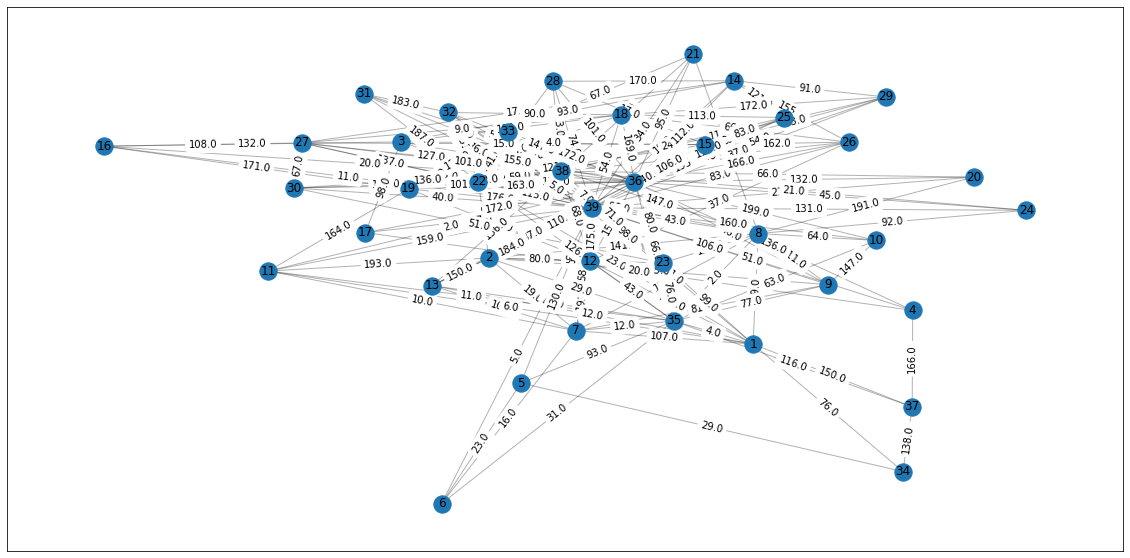

In [51]:
import matplotlib.pyplot as plt

G = nx.read_weighted_edgelist('fibre_optique.txt')
V = nx.number_of_edges(G)
print("Ce graphe a", V, "arêtes")

pos = nx.fruchterman_reingold_layout(G)

plt.figure(figsize = (20, 10))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, alpha = 0.3)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx_labels(G,pos)
plt.show()

Dans cet exercice, nous présentons l'algorithme de Kruskal qui est un algorithme glouton. C'est à dire qu'il cherche à optimiser une solution localement en espérant converger vers l'optimum global.

Soit  GG  un graphe connexe, pondéré par un poids positif  ww . L'algorithme de Kruskal consiste à ajouter des arêtes par ordre de coût croissant, et seulement si elles ne forment pas de cycle (c'est-à-dire : si les deux sommets ne sont pas déjà sur la même composante connexe). La figure suivante illustre un exemple d'application de l'algorithme de Kruskal :

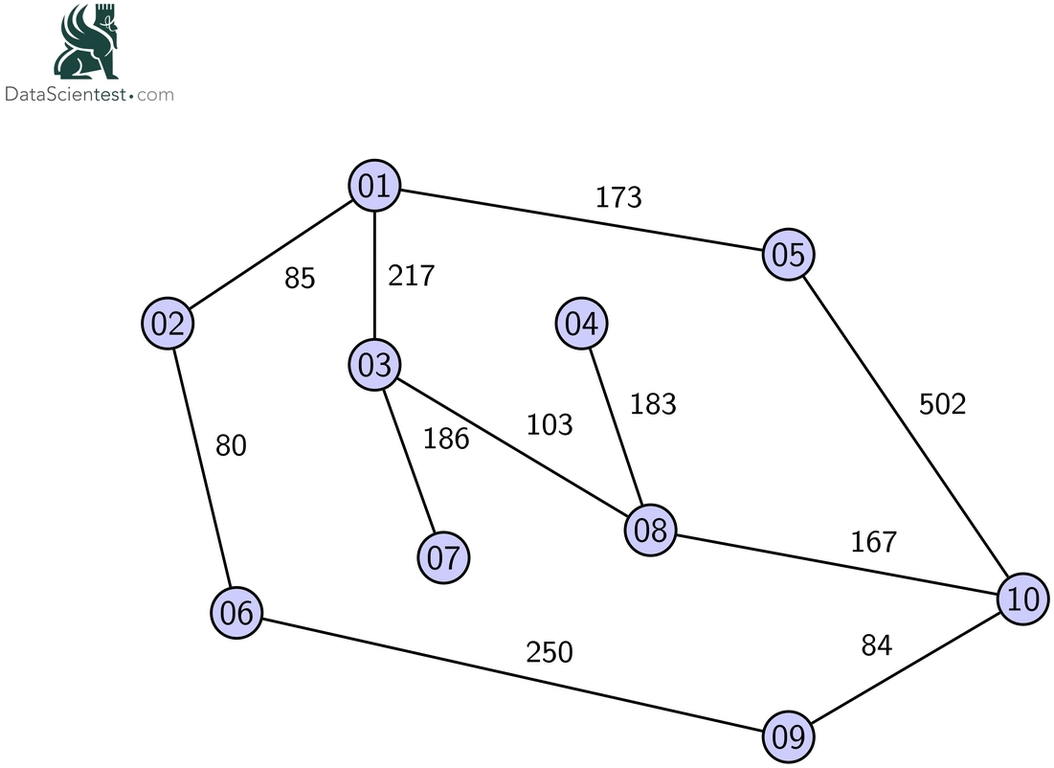

Sous Python, la fonction minimum_spanning_tree de la classe NetworkX.tree permet de trouver l'arbre couvrant minimal d'un graphe en utilisant l'algorithme de Kruskal. Elle prend en paramètres le graphe de type NetworkX Graph.

Stockez dans la variable mst l'arbre couvrant minimal du graphe  GG 
Affichez l'arbre couvrant minimal

Afficher le nombre d'arêtes dans l'arbre couvrant minimal

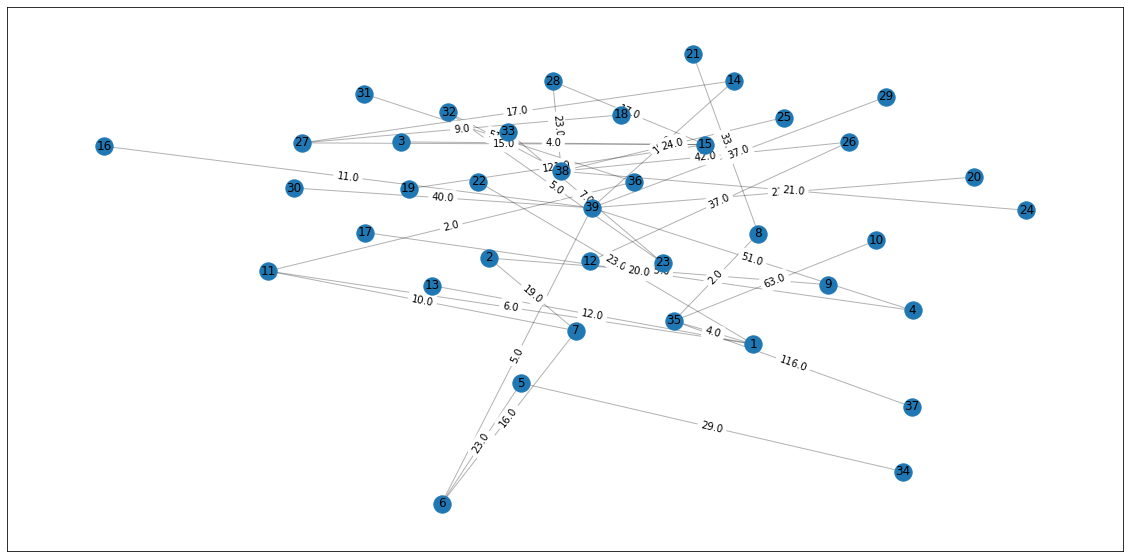

L'arbre couvrant de poids minimal a 38 arêtes


In [52]:
mst = nx.tree.minimum_spanning_tree(G)

plt.figure(figsize = (20, 10))
nx.draw_networkx_nodes(mst, pos)
nx.draw_networkx_edges(mst, pos, alpha = 0.3)
labels = nx.get_edge_attributes(mst,'weight')
nx.draw_networkx_edge_labels(mst,pos,edge_labels=labels)
nx.draw_networkx_labels(mst,pos)
plt.show()

print("L'arbre couvrant de poids minimal a", nx.number_of_edges(mst), "arêtes")

Nous allons terminer cette recherche d'arbre couvrant de poids minimum en quantifiant le poids des arêtes que nous avons retirées. Pour ce faire, nous allons utiliser la méthode size en lui passant l'argument weight = 'weight' ce qui permet d'indiquer où est stockée l'information concernant le poids de arêtes

Afficher la différence de poids total entre le graphe original G et l'arbre couvrant de poids minimum mst

In [53]:
print("Le coût de construction de tous les canaux de fibre est de", G.size(weight = 'weight'), "k€")
print("Le coût de construction du réseau obtenu par Kruskal est de", mst.size(weight = 'weight'), "k€")

Le coût de construction de tous les canaux de fibre est de 16046.0 k€
Le coût de construction du réseau obtenu par Kruskal est de 992.0 k€


### Algorithme de Dijkstra
Un autre problème classique en théorie des graphes est le problème du plus court chemin. On l'a vu, un graphe est une représentation efficace pour un réseau. Imaginons maintenant que nous possédons une représentation sous la forme d'un graphe d'un réseau routier. Nous allons voir comment déterminer de manière efficace le plus court chemin entre deux points du réseau en utilisant l'algorithme de Dijkstra

L'algorithme de Dijkstra commence au sommet qu'on lui indique. Il lui attribue la valeur de distance 0, et attribue une valeur de distance infinie à tous les autres sommets du graphe. Il visite ensuite tous les sommets voisins du point de départ, en mettant à jour leur distance si le chemin emprunté permet de réduire la distance qui leur est attribuée. Une fois que tous les points voisins ont été visités, le point d'origine est mis "hors-jeu" et on choisit un nouveau point de départ. On visite alors tous les voisins de ce second point, en mettant à jour les distaces, et ainsi de suite... On obtient à la fin le plus court chemin entre un point de départ spécifié et tous les autres points du réseau.

Voici un exemple d'itération de l'algorithme de Dijkstra sur un graphe simple :

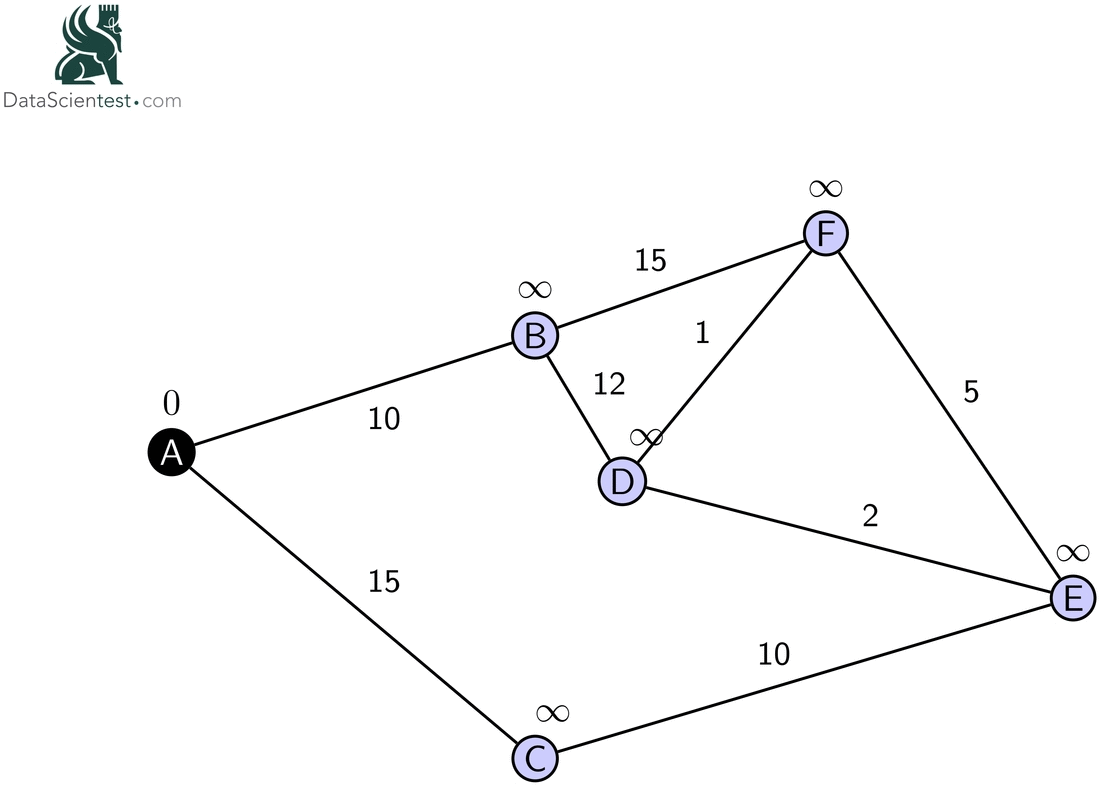

La fonction shortest_path du package NetworkX permet de calculer le plus court chemin entre deux points d'un graphe. Selon les paramètres qu'on utilise, on peut obtenir les plus courts chemins entre toutes les paires de points, depuis un point, vers un point, ou simplement entre deux points spécifiés.

- Pour calculer le + court chemin entre 2 points
nx.shortest_path(G, source = '1', target = '42', weight = 'weight')

- Pour calculer tous les + courts chemins jusqu'à un point
nx.shortest_path_length(G, target = '19', weight = 'weight')
- L'argument weight = 'weight' permet de signifier qu'on veut prendre en compte le poids des arêtes et pas seulement le nombre d'arêtes
Nous allons réutiliser le graphe G précédent. Il représentait en réalité une fraction du réseau routier de la Pennsylvanie.

Calculez et affichez le plus court chemin entre la ville n°9 et la ville n°34

Calculez et affichez le plus court chemin depuis la ville n°12 vers toutes les autres villes.

In [54]:
print("Le plus court chemin entre la ville 9 et la ville 34 est :",nx.shortest_path(G, source = '9', target = '34', weight = 'weight'))
print("La ville 12 est accessible par les chemins :",nx.shortest_path(G, source = '12', weight = 'weight'))

Le plus court chemin entre la ville 9 et la ville 34 est : ['9', '2', '7', '6', '5', '34']
La ville 12 est accessible par les chemins : {'12': ['12'], '7': ['12', '35', '7'], '1': ['12', '35', '1'], '2': ['12', '35', '2'], '19': ['12', '19'], '26': ['12', '26'], '35': ['12', '35'], '36': ['12', '35', '1', '11', '36'], '38': ['12', '38'], '39': ['12', '35', '7', '6', '39'], '14': ['12', '35', '7', '6', '39', '14'], '15': ['12', '38', '28', '15'], '18': ['12', '26', '18'], '8': ['12', '35', '8'], '11': ['12', '35', '1', '11'], '13': ['12', '35', '1', '13'], '22': ['12', '35', '1', '22'], '23': ['12', '38', '32', '23'], '5': ['12', '35', '7', '6', '5'], '6': ['12', '35', '7', '6'], '9': ['12', '35', '1', '11', '36', '9'], '10': ['12', '35', '10'], '37': ['12', '35', '37'], '20': ['12', '35', '7', '6', '39', '20'], '21': ['12', '35', '8', '21'], '24': ['12', '38', '24'], '34': ['12', '35', '1', '34'], '3': ['12', '38', '28', '15', '3'], '4': ['12', '35', '7', '6', '39', '4'], '16': ['12', 

La fonction shortest_path_length permet quant à elle de calculer la longueur du plus court chemin entre deux points. Elle fonctionne selon le même principe que la fonction shortest_path.

Calculer la longueur du chemin entre les villes 9 et 34

In [55]:
nx.shortest_path_length(G, source = '9', target = '34', weight = 'weight')

122.0

Pour caractériser le réseau, une propriété intéressante peut être la longueur moyenne du plus court chemin entre deux villes. Cela permet dans notre cas d'estimer si le réseau est suffisamment dense ou si certains axes devraient y être ajoutés. Avec NetworkX on utilise la fonction average_shortest_path_length qui prend en paramètre le graphe et le poids des arêtes.

Comparez le plus court chemin moyen entre le graphe du réseau complet et l'arbre couvrant minimum calculé plus tôt.

In [56]:
print("Temps de parcours moyen dans le véritable réseau :\t", nx.average_shortest_path_length(G, weight = 'weight'))
print("Temps de parcours moyen dans le réseau réduit :\t\t", nx.average_shortest_path_length(mst, weight = 'weight'))

Temps de parcours moyen dans le véritable réseau :	 83.62483130904184
Temps de parcours moyen dans le réseau réduit :		 106.16194331983806


Les graphes se prêtent particulièrement bien aux problèmes de réseau, mais pas seulement. La théorie des graphes trouve des applications dans bien d'autre domaines comme la gestion d'effectifs, l'utilisation optimale des ressources ou encore des problèmes de couplage comme l'orientation post bac par exemple.

## D - Détection de communautés 
Ce cours portera sur l'analyse des réseaux sociaux. L'objectif principal est d'être capable de résoudre des problèmes de détection de communautés au sein de graphes, en utilisant différentes méthodes.

Un réseau social désigne un ensemble d'individus (au sens large : famille, collègues, organisations, ...) qui sont liés d'une certaine manière, qui interagissent. L'analyse de ces réseaux a connu une très forte accélération ces dernières années avec le développement des médias sociaux.

Détection des communautés

Une communauté est formée par un ensemble d'individus qui interagissent plus souvent entre eux qu'avec les autres. Il s'agit donc de groupes d'individus qui ont formés des liens plus forts ou qui ont des affinités communes.

La détection de communautés a pour rôle de mettre en évidence ces groupes qui se sont formés implicitement, qui ne résultent pas d'un choix explicite. Dans une entreprise, à titre d'exemple, les employés forment des communautés explicites (les services), mais certains vont collaborer plus souvent avec d'autres et former des communautés implicites.

La détection de communautés permet d'identifier des profils types, d'effectuer des actions ciblées, de mieux ajuster les recommandations, réorganisation, d'identifier les acteurs centraux ou influents, etc.

Représentation d'un réseau social
Un réseau social peut être représenté par un graphe  G(V,E)  où  VV  représente l'ensemble des sommets (vertices en anglais) et  EE  l'ensemble des arêtes (edges en anglais). On rappelle qu'un graphe peut être représenté à l'aide de sa matrice adjacence  (Aij) .

Au sens du graphe, une communauté est constitué par un ensemble de nœuds qui sont fortement liés entre eux, et faiblement liés avec les nœuds situés en dehors de la communauté.

Détecter les communautés dans un réseau est un problème qui se ramène souvent à un problème de clustering. Les communautés peuvent être des groupes disjoints ou des groupes avec chevauchement. Nous traiterons principalement des cas de figure où un sommet ne peut appartenir qu'à une communauté, pour des raisons de simplicité, notamment sur les points théoriques.

Exemple : le réseau de Karaté de Zachary
Le réseau de club de Karaté de Zachary est composé de deux communautés disjointes. il décrit les relations d'amitiés entre 34 membres d'un club de Karaté observées lors de la gestion d'un conflit durable entre l'entraîneur "Mr. Hi" et l'administrateur du club "John A". Ce réseau est composé de 78 arêtes liant les membres qui ont interagi dans un autre contexte que les entrainements du club.

La moitié des membres ont formé un nouveau club autour de M. Hi, les membres de l'autre partie ont trouvé un nouvel instructeur ou abandonné le karaté. En se basant sur les données collectées, Zachary a correctement assigné tous les membres du club sauf un aux groupes qu'ils ont rejoints après le conflit.

Exécuter la cellule de code ci-dessous pour créer et afficher le réseau social du club de Karaté



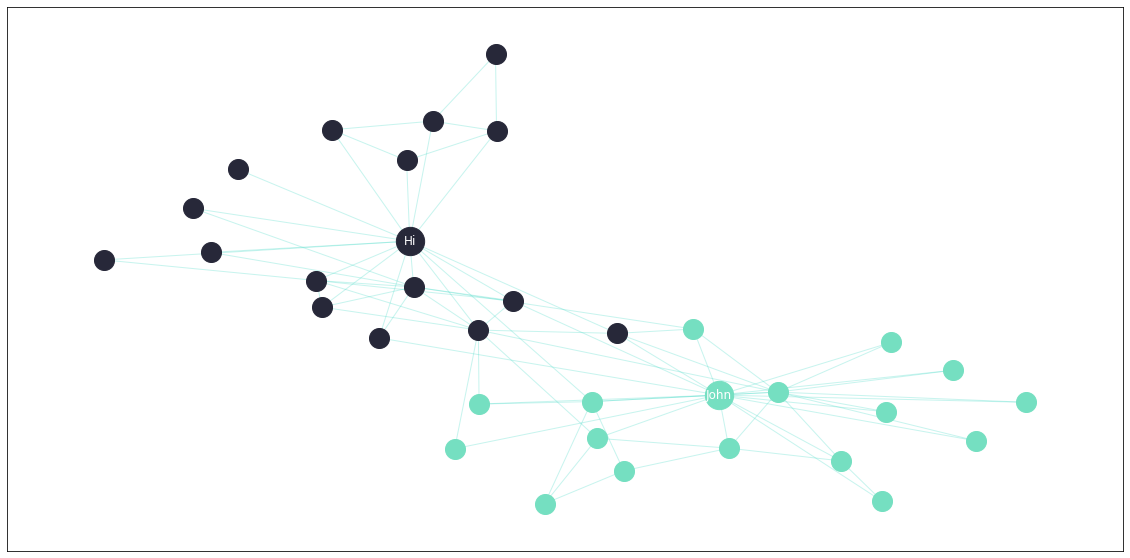

In [4]:
# Importer les packages nécessaires

import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

# Fixer la graine, afin d'avoir des valeurs reproductibles
np.random.seed(1)

# Générer le réseau de karaté de Zachary
z = nx.karate_club_graph()

# Listes des noeuds de chaque communautés
mr_hi_node = [0]
mr_hi_group = [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
john_a_node = [33]
john_a_group = [9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]

# Positionner les noeuds en utilisant l'algorithme Fruchterman-Reingold
# Il permet un positionnement idéal des points sur un graphique pour un eviualisation claire.
pos = nx.fruchterman_reingold_layout(z)

# Afficher les deux communautés du réseau de Karaté
plt.figure(figsize = (20, 10))
nx.draw_networkx_nodes(z, pos, node_size = 400, nodelist = mr_hi_group, node_color = "#272839")
nx.draw_networkx_nodes(z, pos, node_size = 800, nodelist = mr_hi_node, node_color = "#272839")
nx.draw_networkx_nodes(z, pos, node_size = 800, nodelist = john_a_node, node_color = "#75DFC1")
nx.draw_networkx_nodes(z, pos, node_size = 400, nodelist = john_a_group, node_color = "#75DFC1")
nx.draw_networkx_edges(z, pos, alpha = 0.3, edge_color = "#48dbc8")
nx.draw_networkx_labels(z, pos, {0:"Hi", 33:"John"}, font_color = "white")
plt.show()

Le réseau de Karaté de Zachary est stocké dans la variable z

Calculer le nombre d'arêtes et de sommets du réseau z

Vérifier que le réseau de Karaté est connexe

Affecter respectivement aux variables A, diameter et density la matrice d'adjacence, le diamètre et la densité du réseau z

   Le diamètre d'un graphe est la plus grande distance parmi les plus courtes distances entre deux noeuds. Cette valeur donne une idée de l'étendue d'un graphe, et de la manière dont les noeud sont inter-connectés.

In [6]:
import scipy

In [7]:
# Nombre de sommets et d'arêtes
print("Nombre d'arêtes \t:", z.size())
print("Nombre de sommets \t:", z.order())

# Vérifier que le réseau est connexe
is_connected = nx.is_connected(z)
print("Le réseau de Karaté est", (1 - is_connected) * "non", 'connexe')

A = nx.adjacency_matrix(z)
diameter = nx.diameter(z)
density = nx.density(z)

Nombre d'arêtes 	: 78
Nombre de sommets 	: 34
Le réseau de Karaté est  connexe


C:\Users\UserPC\AppData\Local\Temp\ipykernel_8080\2032483827.py:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(z)


AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

### Approche Agglomérative
L'approche agglomérative consiste à définir une mesure de similarité entre les sommets à partir de la matrice d'adjacence, et ensuite utiliser Classification Ascendante Hiérarchique, CAH. L'algorithme commence par isoler tous les points dans une communauté, puis à grouper les communautés les plus similaires ensemble.

Il existe de nombreuses métriques de similarité comme celle de Jaccard ou cosinus. Dans cet exercice, nous utiliserons le plus court chemin entre les noeuds. Il est calculé par le biais de la fonction all_pairs_shortest_path_length de NetworkX qui renvoie un dictionnaire contenant la longueur du plus court chemin entre deux sommets.

Dans un dictionnaire path_length, stocker les plus courts chemins entre tous les noeuds du graphe
Faire une double boucle pour créer une matrice de distance distances à partir de ce dictionnaire.
   Cette matrice devra donc être une matrice carrée dont la dimension sera égale au nombre de noeuds dans le graphe.

In [8]:
# Calculer la longueur de plus court chemin entre tous les sommets du graphe z
path_length = dict(nx.all_pairs_shortest_path_length(z))

# Définir la matrice distances
n = len( z.nodes() )
distances = np.zeros((n, n))
for u in path_length.keys() :
    for v in path_length[u].keys() :
        distances[u][v] = path_length[u][v]

Une fois la matrice de similarité générée, nous appliquons la classification ascendante hiérarchique. Elle va grouper les individus les plus semblables entre eux. Pour cela on utilise la fonction linkage du sous-package scipy.cluster.hierarchy. Nous utiliserons la méthode de Ward pour grouper les clusters

Importer la fonction linkage du sous package scipy.cluster.hierarchy
Dans une variable hclust stocker le résultat de la CAH appliquée sur la matrice des distances avec la méthode de Ward

In [9]:
from scipy.cluster.hierarchy import linkage

hclust = linkage(distances, method = 'ward')

C:\Users\UserPC\AppData\Local\Temp\ipykernel_8080\4088243685.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hclust = linkage(distances, method = 'ward')


Nous allons maintenant utiliser une technique de visualisation pour les clustering hiérarchiques : le dendrogramme. Cette figure montre les différents groupes obtenus à chaque étape et les liaisons entre eux. La première ligne représente les données, les nœuds représentent les regroupements auxquels les données appartiennent. La hauteur de chaque nœud est proportionnelle à la valeur de la dissemblance intergroupe entre ses deux noeuds fils.

Importer la fonction dendrogram du sous package scipy.cluster.hierarchy
Utiliser la fonction dendrogram appliquée à hclust
   Le paramètre entier >color_threshold permet de définir la manière dont sera colorée le dendrogramme, mettant en évidence les clusters identifiés

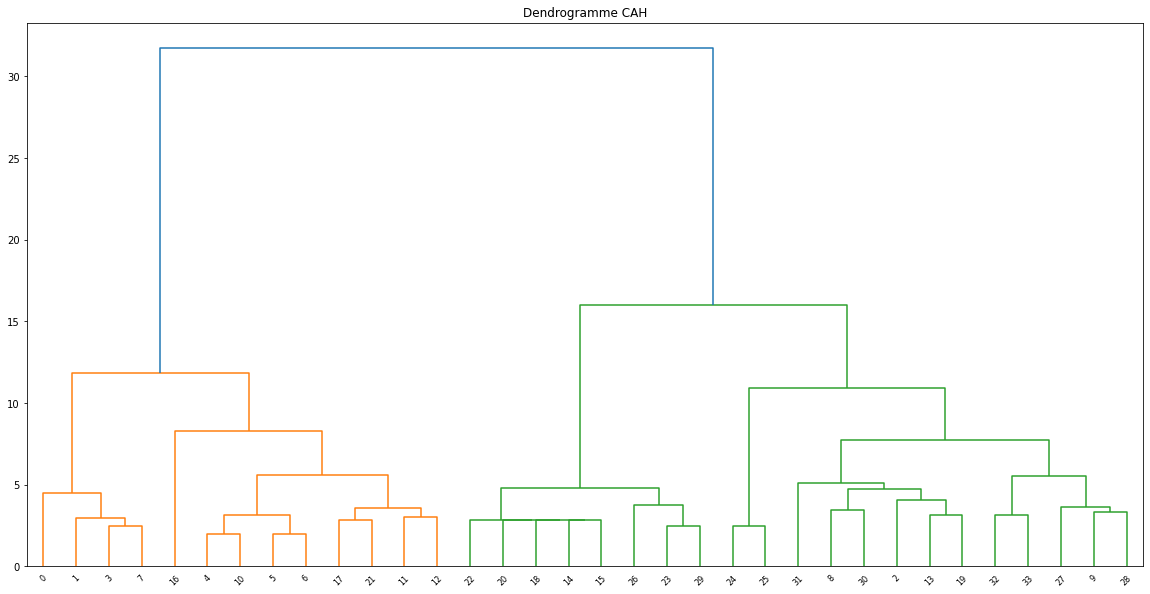

In [10]:
from scipy.cluster.hierarchy import dendrogram


# Initialisaion de la figrue
plt.figure(figsize=(20, 10))
# Affichage du dendrogramme
plt.title("Dendrogramme CAH")
dendrogram(hclust, color_threshold = 17)
plt.show()

### Maximisation de modularité

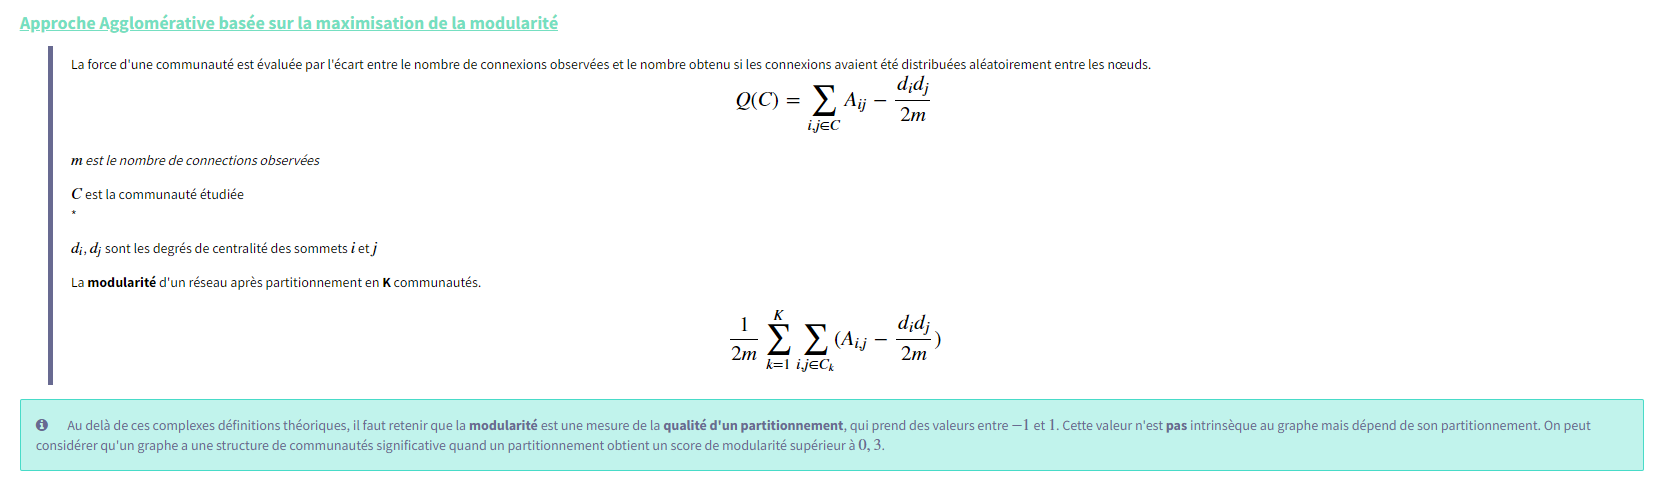

La méthode de Louvain consiste à maximiser la fonction de modularité pour partitionner un graphe, en s'assurant que le nombre et le poids des liens est plus important à l'intérieur des partitions qu'entre les partitions. Autrement dit, la densité intra-communautaire dépasse la densité intercommunautaire.

Au lancement de l'algorithme, tous les sommets appartiennent à une partition différente. Ils sont regroupés, par itération, dans des partitions de modularité optimale. Arrivé à une première situation d'optimum, les sommets partitionnés ensemble sont groupés et traités ensuite comme un seul sommet. On reprend alors à la première étape, et ce jusqu'à ce qu’il n'y ait plus aucun gain de modularité possible.

La fonction best_partition de la classe community.community_louvain permet de trouver la meilleure partition en utilisant la méthode de Louvain.

Importer la fonction best_partition de la classe community.community_louvain

Stocker dans une variable best_part le partitionnement retourné la méthode de Louvain

In [11]:
# Importer la classe community_louvain
from community.community_louvain import best_partition

# Calculer et afficher la meilleure répartition des groupes
best_part = best_partition(z)
print('La meilleure répartition est:\n', best_part)

La meilleure répartition est:
 {0: 0, 1: 1, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0, 7: 1, 8: 3, 9: 3, 10: 0, 11: 0, 12: 1, 13: 1, 14: 3, 15: 3, 16: 0, 17: 0, 18: 3, 19: 0, 20: 3, 21: 0, 22: 3, 23: 2, 24: 2, 25: 2, 26: 3, 27: 2, 28: 2, 29: 3, 30: 3, 31: 2, 32: 3, 33: 3}


La méthode de Louvain est la méthode la plus efficace pour partitionner un graphe en communautés. Vous trouverez davantage d'informations sur le fonctionnement détaillé de cet algorithme sur la fiche technique. Nous allons maintenant afficher le partitionnement que nous avons effectué sur le graphe du groupe de karaté.    

L'objet retourné par la fonction best_partition contient les indices des clusters assignés à chaque point. On les récupère en appelant la méthode values

Créer une liste node_cluster contenant le cluster auquel appartiennent les noeuds du graphe.

Afficher le graphique en utilisant la disposition de Fruchterman Raynold

Afficher les noeuds en les colorant selon leur cluster.

Afficher les arêtes et les étiquettes.

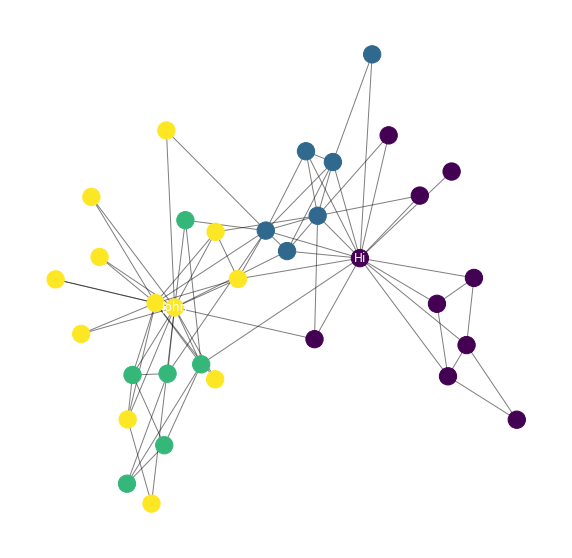

In [12]:
# Afficher les différents groupes de la meilleure répartition du réseau z
plt.figure(figsize=(10,10))
plt.axis('off')
pos = nx.fruchterman_reingold_layout(z)
node_cluster = list(best_part.values())
nx.draw_networkx_nodes(z, pos, node_color = node_cluster)
nx.draw_networkx_edges(z, pos, alpha = 0.5)
nx.draw_networkx_labels(z, pos, {0:"Hi", 33:"John"}, font_color = "white")
plt.show()

### Approche divise, Girvan-Newman

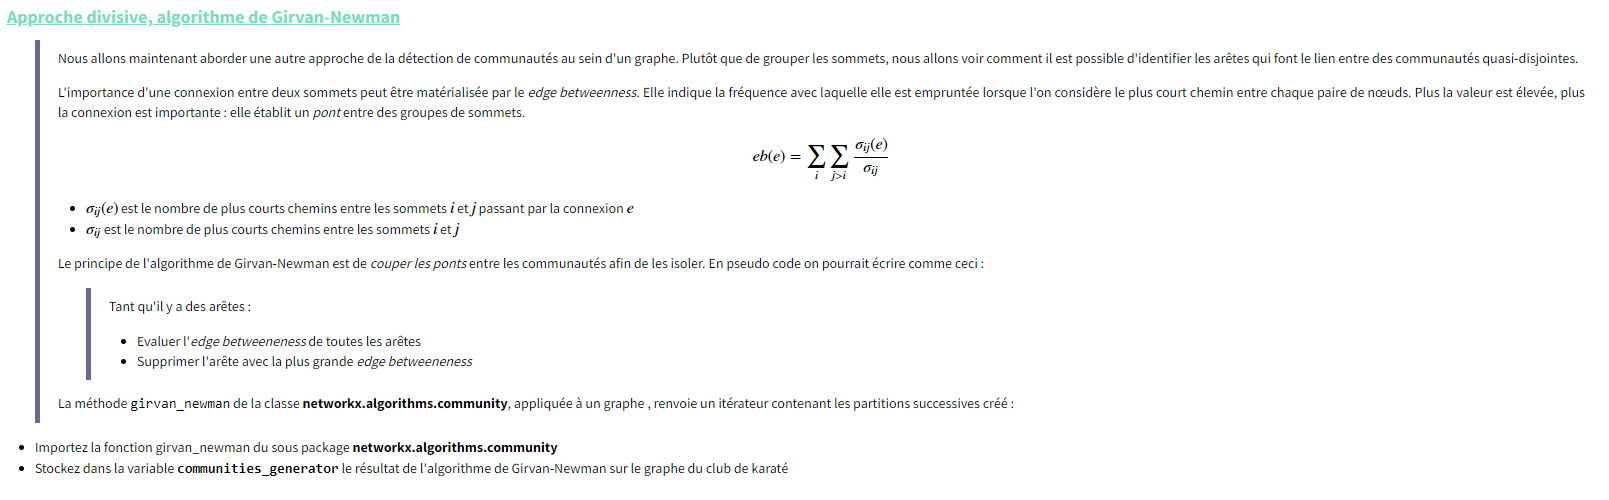

In [13]:
from networkx.algorithms.community import girvan_newman
communities_generator = nx.algorithms.community.girvan_newman(z)

On obtient alors un itérateur, que l'on peut utiliser de la manière suivante :

- Accéder à la première répartition des sommets du graphe G 
top_level_communities = next(communities_generator)
- Accéder à la répartition suivante 
next_level_communities = next(communities_generator)
A chque fois que l'on appelle la fonction next on obtient un nouveau partitionnment, sous la forme d'un tuple d'ensembles.

Dans une variable community affectez le premier partitionnement créé par l'algorithme de Girvan-Newman et l'afficher

In [14]:
community = next(communities_generator)
community

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

### Évaluation de l'approche divisive
Afin d'évaluer la qualité d'une partition, la fonction performance de la classe networkx.algorithms.community.quality compare la somme des arêtes intercommunautaires absentes et des arêtes intracommunautaires avec le nombre d'arêtes dans un graphe complet ayant le même nombre de sommets. Cette fonction prend en paramètres un graphe de type NetworkX Graph et une répartition des sommets de ce graphe représentée sous forme d'une séquence de sommets.

   L'important ici est de retenir que la fonction  performance prend en paramètre un graphe et une répartition de sommets sous forme de séquence, et renvoie un score entre 0 et 1 qui mesure la qualité d'un partitionnement.   
   
Importez la fonction performance du sous package networkx.algorithms.community.quality
Calculez la performance du partitionnement community et l'afficher

## E - Algorithme PageRank 
Dans ce cours nous allons voir comment on peut, à partir d'un graphe, classer différents individus entre eux. Pour ce faire nous allons prendre pour exemple un des algorithmes qui fut longtemps employé par Google: l'algorithme de PageRank. Cet algorithme sert à classer plusieurs pages Web entre elles en fonction du nombre d'hyperliens contenus dans chaque page.

Ici, nous allons nous intéresser à un graphe ayant pour noeud l'adresse de différents blogs politiques. Étant donné que les hyperliens sont à sens unique, on a un graphe orienté.

Exécuter la cellule suivante pour importer les modules nécessaires.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from random import randint
%matplotlib inline

À l'aide de la commande read_gml du module NetworkX, lire le fichier polblogs.gml dans une variable Gr.  

Combien y a t'il de noeuds et d'arêtes?

In [19]:
# Lecture du fichier 'polblogs.gml'
Gr = nx.read_gml('polblogs3.gml')
# Affichage du nombre de noeuds
print('Il y a ',nx.number_of_nodes(Gr),' noeuds.', sep = '')
# Affichage du nombre d'arêtes
print('Il y a ',nx.number_of_edges(Gr),' arêtes.', sep = '')

Il y a 1490 noeuds.
Il y a 19090 arêtes.


Il y a beaucoup trop de noeuds et d'arêtes pour pouvoir les afficher en temps raisonnable, on va arbitrairement s'intéresser pour le moment au voisinage du site alternateworlds.blogspot.com. On pourra ainsi visualiser les résultats de l'algorithme PageRank.

Créer une liste L contenant le voisinage du site alternateworlds.blogspot.com en utilisant la méthode adj d'un Graph.
En utilisant la méthode subgraph, créer un sous-graphe G de Gr avec L.

In [20]:
# Création de la liste L grâce à la méthode adj
L = list(Gr.adj['alternateworlds.blogspot.com'])
# Remplacement de G par son sous-graphe du voisinage de "alternateworlds.blogspot.com"
G = Gr.subgraph(L)

On peut maintenant représenter un sous-graphe lisible sur lequel on pourra visualiser l'algorithme PageRank.

Créer un dictionnaire qui à chaque élément de L associe un indice.
   On pourra créer le dictionnaire par compréhension.

In [21]:
# On définit le nouveau nombre de noeuds de G
N = nx.number_of_nodes(G)
# Création du dictionnaire par compréhension
dic = dict((L[i], i) for i in range(N))

Tracer le sous-graphe G en utilisant le dictionnaire précédemment créé comme variable labels et la fonction draw_circular du module NetworkX.

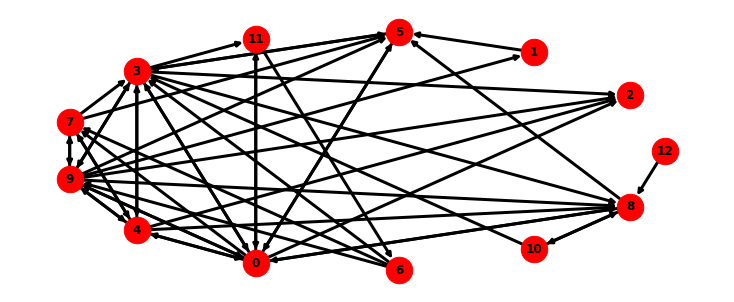

In [22]:
# Création des options du graphe à l'aide de Matplotlib en précisant labels': dic
plt.figure(figsize = (10, 4))
options = {
    'node_color': '#FF0000',
    'edge_color': '#000000',
    'node_size': 700,
    'width': 3,
    'with_labels': True,
    'font_weight': 'bold',
    'labels': dic
}
# Affichage du graphe
nx.draw_circular(G, **options)
plt.show()

### Algorythme simplifié

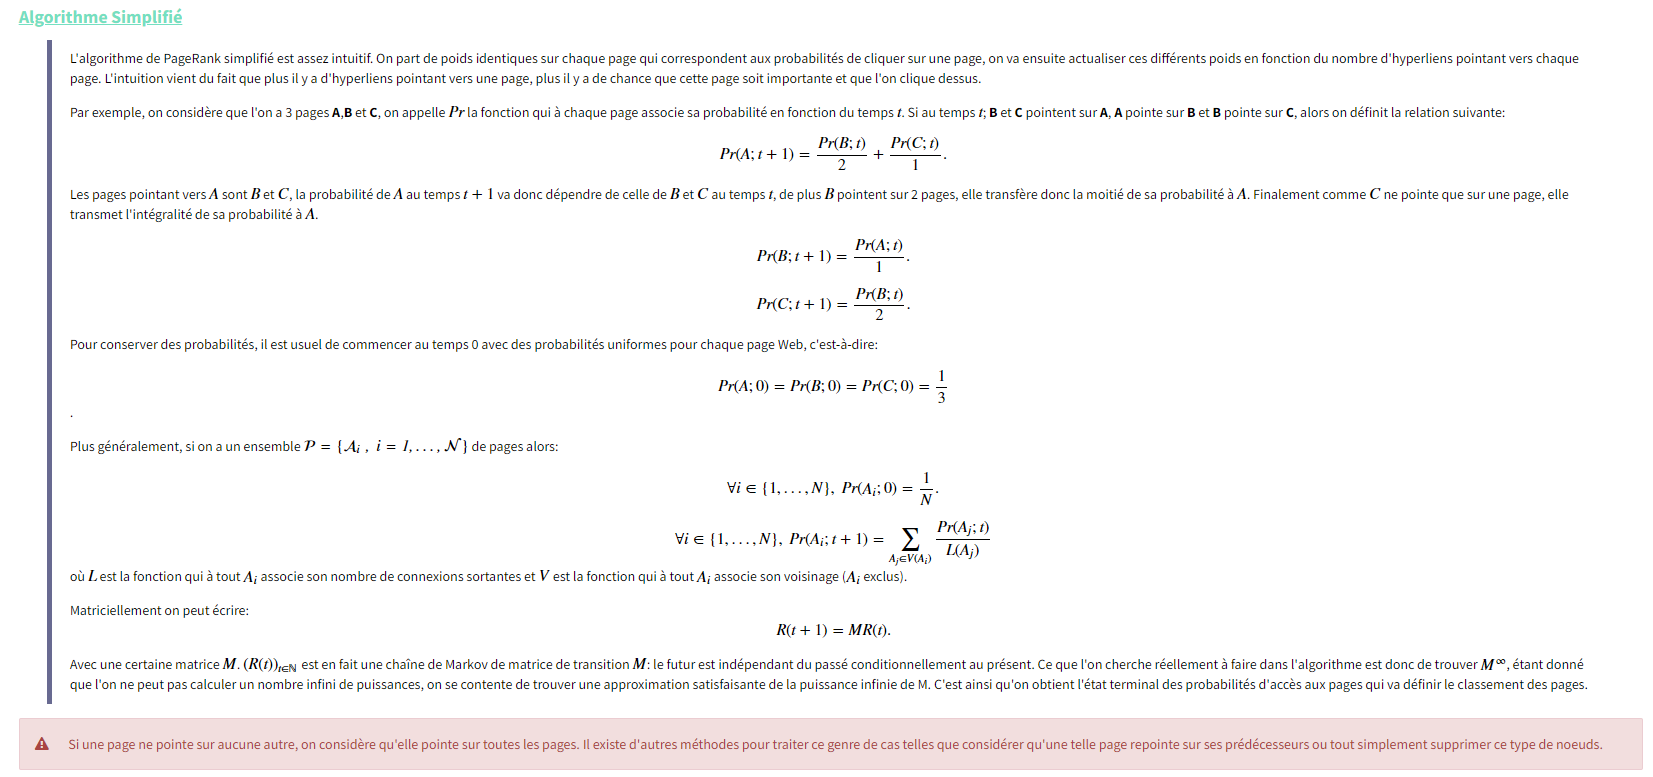

Lancer la cellule suivante pour définir la fonction PageRankSimple.

In [23]:
def PageRankSimple(G, dic, pagerank_old):
    N = nx.number_of_nodes(G)
    # Création de l'itération+1
    pagerank_new = np.ones(N)
    # On applique l'algorithme à tous les noeuds de G
    for site in G.nodes():
        somme = 0
        # on fait la somme où on attribue à chaque page pointant vers notre page son ancienne probablité divisée par le nombre
        # de pages total
        for voisin in G.predecessors(site):
            somme += pagerank_old[dic[voisin]]/G.out_degree(voisin)
        # Traitement des noeuds qui n'ont pas de liens sortants
        for s in G.nodes():
            if G.out_degree(s) == 0:
                somme += pagerank_old[dic[s]]/N
        # On stock les valeurs dans le nouveau vecteur des poids
        pagerank_new[dic[site]] = somme
    # On actualise les anciennes valeurs des poids
    return(pagerank_new)

Appliquer l'algorithme PageRank simple trois fois.

Vérifier que la somme des  Pr  à chaque étape est proche de 1.

In [24]:
# Initialisation des poids
pagerank_old = np.ones(N)/N
for compteur in range(3):
    # On applique l'algorithme à G, son dictionnaire et le vecteur des poids à actualiser
    pagerank_new = PageRankSimple(G, dic, pagerank_old)
    # Le nouveau vecteur des poids devient maintenant l'ancien
    pagerank_old = pagerank_new
    print('La somme des poids vaut ', np.sum(pagerank_new),', ce qui vaut bien approximativement 1.'\
if np.isclose(1,np.sum(pagerank_new)) else "La somme n'est pas proche de 1.", sep = '')

La somme des poids vaut 1.0, ce qui vaut bien approximativement 1.
La somme des poids vaut 1.0000000000000002, ce qui vaut bien approximativement 1.
La somme des poids vaut 1.0, ce qui vaut bien approximativement 1.


D'après cette méthode, quelles sont les 4 plus grosses pages Web? Cela se rapproche t'il de ce que l'on observe graphiquement? On pourra utiliser la fonction argsort du module NumPy.

In [25]:
print('Les 4 plus gros sites Web ont pour indices: ', np.argsort(pagerank_new)[-4:], ' ce qui correspond aux sites\
 Web suivants:', sep = '')
for i in np.argsort(pagerank_new)[-4:]:
    print(list(dic.items())[i][0])
# Graphiquement on peut remarquer la même chose

Les 4 plus gros sites Web ont pour indices: [8 5 3 0] ce qui correspond aux sites Web suivants:
talkingpointsmemo.com
juancole.com
dailykos.com
atrios.blogspot.com


### Algo Facteur Amortissement

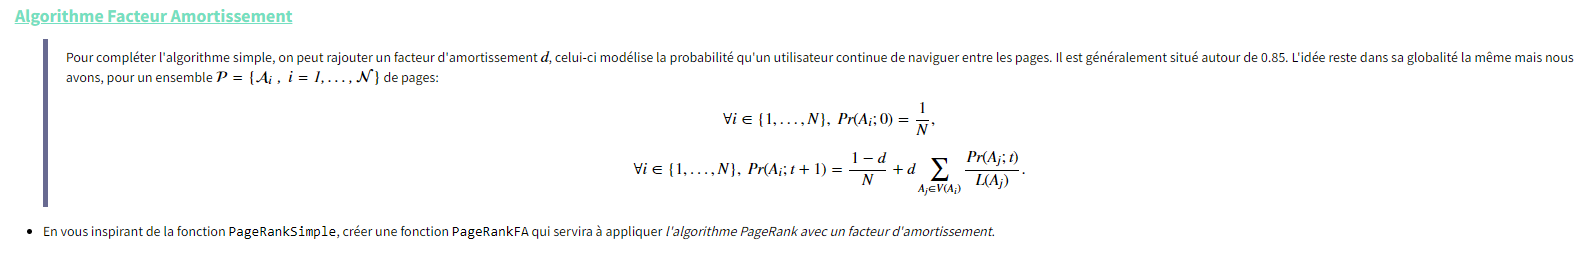

In [26]:
def PageRankFA(G, dic, pagerank_old, d = 0.85):
    N = nx.number_of_nodes(G)
    # Création de l'itération+1
    pagerank_new = np.ones(N)
    # On applique l'algorithme à tous les noeuds de G
    for site in G.nodes():
        somme = 0
        # Calcul de la somme
        for voisin in G.predecessors(site):
            somme += pagerank_old[dic[voisin]]/G.out_degree(voisin)
        # Traitement des noeuds qui n'ont pas de liens sortants
        for s in G.nodes():
            if G.out_degree(s) == 0:
                somme += pagerank_old[dic[s]]/N
        # On stock les valeurs dans le nouveau vecteur des poids
        pagerank_new[dic[site]] = (1-d)/N+d*somme
    # On actualise les anciennes valeurs des poids
    return(pagerank_new)

Appliquer l'algorithme PageRank avec un facteur d'amortissement trois fois.

Vérifier que la somme des  PrPr  à chaque étape est proche de 1

In [27]:
# Initialisation des poids
pagerank_old = np.ones(N)/N
for compteur in range(3):
    # On applique l'algorithme à G, son dictionnaire et le vecteur des poids à actualiser
    pagerank_new = PageRankFA(G, dic, pagerank_old)
    # Le nouveau vecteur des poids devient maintenant l'ancien
    pagerank_old = pagerank_new
    print('La somme des poids vaut ', np.sum(pagerank_new),', ce qui vaut bien approximativement 1.'\
if np.isclose(1,np.sum(pagerank_new)) else "La somme n'est pas proche de 1.", sep = '')

La somme des poids vaut 1.0, ce qui vaut bien approximativement 1.
La somme des poids vaut 1.0000000000000002, ce qui vaut bien approximativement 1.
La somme des poids vaut 1.0, ce qui vaut bien approximativement 1.


La méthode vue précédemment converge plus vite si l'on dispose de nombreuses pages Web.

D'après cette méthode, quelles sont les 4 plus grosses pages Web? Cela se rapproche t'il de ce que l'on obtenait précédemment?

In [28]:
print('Les 4 plus gros sites Web ont pour indices: ',np.argsort(pagerank_new)[-4:],' ce qui correspond aux sites\
Web suivants:', sep = '')
for i in np.argsort(pagerank_new)[-4:]:
    print(list(dic.items())[i][0])
# On obtient bien la même chose que précédemment

Les 4 plus gros sites Web ont pour indices: [8 5 3 0] ce qui correspond aux sitesWeb suivants:
talkingpointsmemo.com
juancole.com
dailykos.com
atrios.blogspot.com


### Application à tout le Graphe

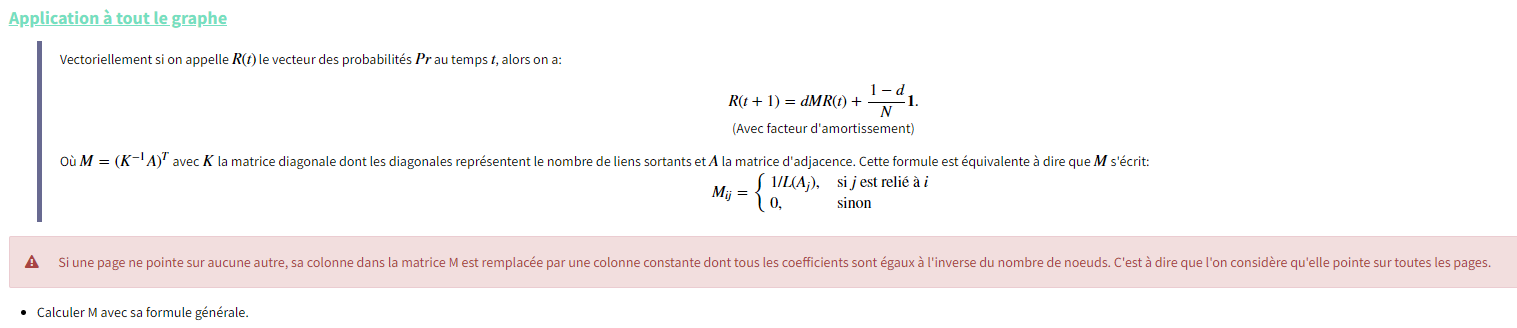

In [29]:
L = list(Gr.nodes())
N = len(L)
# Création d'un dictionnaire pour toute la base
dic = dict((L[i], i) for i in range(N))
# Initialisation de la matrice M
M = np.zeros((N,N))
# Remplissage de la matrice par colonne
for j in range(N):
    # Liste des pages sur lesquelles la colonne pointe
    liste = list(Gr.successors(L[j]))
    Nl = len(liste)
    # Remplissage de chacune des cases de ces pages par la formule définit précédemment
    for i in range(Nl):
        M[dic[liste[i]], j] = 1/Nl
# Traitement des colonnes nulles
for j in range (N):
    if np.sum(M[:,j]) == 0:
        M[:,j] = np.ones(N)/N

   Si l'on souhaite remplir la matrice ligne par ligne, on s'intéresse alors aux prédécesseurs du noeud représentant les lignes.
Il est établi que cet algorithme converge en  log(n)  où  nn  est le nombre de noeuds.

Appliquer l'algorithme à l'ensemble de la base pour un nombre d'itération adapté.

Vérifier que la somme des  PrPr  est relativement proche de 1.

In [30]:
iter = int(round(np.log(N)))
# Déclaration du facteur d'amortissement
d = 0.85
# Initialisation des poids
pagerank_old = np.ones(N)/N
# Initialisation du nouveau vecteur des poids
pagerank_new = np.ones(N)
# Création du vecteur constant
vconst = np.ones(N)*(1-d)/N
for _i in range(iter):
    pagerank_new = d*np.matmul(M,pagerank_old)+(1-d)/N
    pagerank_old = pagerank_new
np.sum(pagerank_new)
print('La somme des poids vaut ', np.sum(pagerank_new),', ce qui vaut bien approximativement 1.'\
if np.isclose(1,np.sum(pagerank_new)) else "La somme n'est pas proche de 1.", sep = '')

La somme des poids vaut 1.0000000000000004, ce qui vaut bien approximativement 1.


D'après cette méthode quels sont les 10 plus gros sites Web?

In [31]:
print('Les 10 plus gros sites Web ont pour indices: ',np.argsort(pagerank_new)[-10:],' ce qui correspond aux sites\
 Web suivants:', sep = '')
L = list(Gr.nodes())
dic = dict((L[i], i) for i in range(N))
for i in np.argsort(pagerank_new)[-10:]:
    print(list(dic.items())[i][0])
# On obtient bien la même chose que précédemment

Les 10 plus gros sites Web ont pour indices: [ 797 1244  728  962 1152  640  854 1050   54  154] ce qui correspond aux sites Web suivants:
andrewsullivan.com
powerlineblog.com
washingtonmonthly.com
drudgereport.com
michellemalkin.com
talkingpointsmemo.com
blogsforbush.com
instapundit.com
atrios.blogspot.com
dailykos.com


### Idée Algorithmique 
L'algorithme PageRank cherche en fait à trouver les probabilités pour qu'un individu surfant sur le Web soit sur une page précise. Mathématiquement on va chercher à partir d'une marche aléatoire sur le graphe, la probabilité d'être sur une certaine page.

Exécuter la cellule suivante qui définit le résultat d'une marche aléatoire sur un graphe.

In [32]:
def marche_aléatoire(G = Gr, pas = 10, init = None):
    N = nx.number_of_nodes(G)
    # Création de la liste des noeuds
    L = list(G.nodes())
    # On va définir la fonction par récursivité, pour ça il faut distinguer les cas où on est déjà au milieu
    # de la marche aléatorie du cas où on est au début du graphe
    if init == None:
        # Si on n'a pas initialisé la marche aléatoire, on choisit un noeud au hasard du graphe
        X = randint(0,N-1)
        Start = L[X]
    else:
        # Sinon on utilise le noeud renseigné
        Start = init
    # On utilise l'algorithme avec facteur d'amortissement
    d = 0.85
    Stop = randint(1,100)
    if Stop > 85:
        return(Start)
    # On définit les successeurs du noeud initial pour savoir où aller
    V = list(G.successors(Start))
    # Si il n'y a pas de voisin, on recommence la marche en choisissant au hasard un nouveau noeud du graphe,
    # on perd donc un pas
    if len(V) == 0:
        return(marche_aléatoire(G = Gr , pas = pas-1, init = None))
    else:
        # On choisit un voisin au hasard dans les successeurs du noeud initial
        Y = randint(0, len(V)-1)
        if pas == 1:
            # Si le pas vaut 1 on retourne ce voisin, on aura fait une marche aléatoire de taille 1
            return(V[Y])
        else:
            # Sinon on réapplique notre fonction avec comme noeud initial, le voisin précédemment choisi
            # et on diminue le pas de 1
            return(marche_aléatoire(G = Gr , pas = pas-1, init = V[Y]))

Pour obtenir à partir d'une liste de sites Web ceux qui apparaissent le plus souvent, définir une fonction trimi qui prendra pour argument une liste et renverra une liste de tuple triée.   

   On pourra utiliser un dictionnaire ayant pour clé les éléments de la liste et pour valeurs la fréquence de ceux-ci pour le transformer en liste de tuple.

In [33]:
def trimi(L):
    # On définit un dictionnaire vide
    Di = {}
    taille = len(L)
    # On itère sur chaque élément de la liste pour les rajouter dans le dictionnaire
    for i in range(taille):
        # Si l'élément n'est pas dans le dictionnaire, on le rajoute avec une fréquence de 1
        if L[i] not in Di:
            Di = { **Di, **{ L[i] : 1}}
        # Sinon on augmente de 1 sa fréquence dans le dictionnaire
        else:
            Di[L[i]] += 1
    # On retourne le dictionnaire trié selon les valeurs
    return(sorted(Di.items(), key = lambda val: val[1]))

Appliquer la méthode de la marche aléatoire au graphe Gr et donnez les 10 plus grosses pages Web issues de cette technique. Qu'observez vous?

In [34]:
L = []
# On crée une liste de 100000 marches aléatoires
for _i in range(10000):
    L.append(marche_aléatoire())
# On l'a tri
tri = trimi(L)
# On affiche les 10 éléments qui reviennent le plus souvant
tri[-10:]
# On se rend compte que c'est quasiment la même chose qu'en utilisant l'algorithme de PageRank

[('littlegreenfootballs.com/weblog', 92),
 ('juancole.com', 93),
 ('michellemalkin.com', 110),
 ('talkingpointsmemo.com', 115),
 ('drudgereport.com', 116),
 ('blogsforbush.com', 118),
 ('washingtonmonthly.com', 119),
 ('instapundit.com', 146),
 ('atrios.blogspot.com', 158),
 ('dailykos.com', 219)]

 Il se peut que le calcul des marches aléatoires prenne du temps, c'est d'ailleurs pourquoi on utilise l'algorithme de PageRank.
Il existe plusieurs variantes du PageRank, dans notre exemple, le graphe était orienté, cependant il se peut que celui-ci ne le soit pas. Heureusement il existe une manière de classer les pages de la même manière sur un graphe non orienté. Pour cela il suffit de considérer tous les liens comme des liens montants et descendants. De nombreuses autres variantes du PageRank existent, pour plus d'information vous pouvez vous référez à la page Wikipedia du PageRank pour connaître le nom de ces autres variantes.

Finalement il existe aussi une fonction pagerank directement implémenté dans NetworkX, on peut l'importer du sous-module networkx.algorithms.link_analysis.pagerank_alg. Elle fonctionne comme ce que nous venons de voir dans ce cours, pour plus d'informations sur cette fonction et le sous-module networkx.algorithms.link_analysis.pagerank_alg, vous pouvez cliquer ici.  https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

## F - Exploration d'un réseau social : Les Misérables 


Nous allons conclure ce module de théorie des graphes et détection de communauté en reprenant notre exemple des Misérables. Pour rappel, deux personnages sont reliés par une arête du graphe s'ils apparaissent au cours du même chapitre. L'objectif de l'exercice est d'identifier les communautés de personnage au sein de ce roman.

Importez le graphe stocké dans le fichier lesmis.gml
Effectuez une première visualisation du graphe
À l'aide de la méthode de votre choix, effectuez une détection de communautés dans ce graphe
Visualisez le résultat de cette détection de communautés
À l'aide de la métrique de votre choix, mesurez la performance de votre partitionnement